In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc

In [4]:
data=pd.read_csv('D:/innovatex/Detection-of-Fraud-in-Financial-Transactions/PS_20174392719_1491204439457_log.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
a=data[(data['type']=="TRANSFER") | (data['type']=="CASH_OUT")]
a.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0


In [6]:
y=a["isFraud"]
y.head() 

2     1
3     1
15    0
19    0
24    0
Name: isFraud, dtype: int64

In [7]:
x=a.drop(["nameOrig","nameDest","isFraud","isFlaggedFraud"],axis=1)
x.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
2,1,TRANSFER,181.00,181.0,0.0,0.0,0.00
3,1,CASH_OUT,181.00,181.0,0.0,21182.0,0.00
15,1,CASH_OUT,229133.94,15325.0,0.0,5083.0,51513.44
19,1,TRANSFER,215310.30,705.0,0.0,22425.0,0.00
24,1,TRANSFER,311685.89,10835.0,0.0,6267.0,2719172.89


In [11]:
scale=StandardScaler()
x_to_scale=np.array(pd.DataFrame(x,columns=["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]))
X_scaled=scale.fit_transform(x_to_scale)
X_scaled

array([[-0.35746665, -0.18884736, -0.10638868, -0.40315492, -0.43825939],
       [-0.35746665, -0.18884736, -0.10638868, -0.39814208, -0.43825939],
       [-0.09957563, -0.12859074, -0.10638868, -0.401952  , -0.42724516],
       ...,
       [ 6.75145759, 24.9229649 , -0.10638868, -0.38694665,  0.92584427],
       [ 0.59976648,  3.19251638, -0.10638868, -0.40315492, -0.43825939],
       [ 0.59976648,  3.19251638, -0.10638868,  1.13749648,  1.1354243 ]])

In [12]:
x.loc[x.type == 'TRANSFER', 'type'] = 0
x.loc[x.type == 'CASH_OUT', 'type'] = 1
x.type = x.type.astype(int)
x.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
2,1,0,181.00,181.0,0.0,0.0,0.00
3,1,1,181.00,181.0,0.0,21182.0,0.00
15,1,1,229133.94,15325.0,0.0,5083.0,51513.44
19,1,0,215310.30,705.0,0.0,22425.0,0.00
24,1,0,311685.89,10835.0,0.0,6267.0,2719172.89


In [13]:
x=x.reset_index(drop=True)
x.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,0,181.00,181.0,0.0,0.0,0.00
1,1,1,181.00,181.0,0.0,21182.0,0.00
2,1,1,229133.94,15325.0,0.0,5083.0,51513.44
3,1,0,215310.30,705.0,0.0,22425.0,0.00
4,1,0,311685.89,10835.0,0.0,6267.0,2719172.89


In [14]:
x_type=x['type']
x_type.head()

0    0
1    1
2    1
3    0
4    0
Name: type, dtype: int32

In [15]:
X_scaled_df=pd.DataFrame(X_scaled, columns=["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"])
#X_final=X_scaled_df.join(x_type, how='outer')
#X_final=X_final.values
#X_final

In [16]:
X_final_inner=X_scaled_df.join(x_type, how='inner')
#X_final=X_final.values
X_final_inner.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type
0,-0.357467,-0.188847,-0.106389,-0.403155,-0.438259,0
1,-0.357467,-0.188847,-0.106389,-0.398142,-0.438259,1
2,-0.099576,-0.128591,-0.106389,-0.401952,-0.427245,1
3,-0.115146,-0.186762,-0.106389,-0.397848,-0.438259,0
4,-0.006590,-0.146456,-0.106389,-0.401672,0.143134,0


In [17]:
X_train,X_test,y_train,y_test=train_test_split(X_final_inner,y,test_size=0.2,random_state=0)

In [18]:
knn=KNeighborsClassifier()

In [19]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [21]:
y_predict=knn.predict(X_test)

In [22]:
knn.score(X_test,y_test)

0.9991355070188167

In [23]:
print(confusion_matrix(y_test,y_predict))

[[552329    117]
 [   362   1274]]


In [24]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552446
           1       0.92      0.78      0.84      1636

    accuracy                           1.00    554082
   macro avg       0.96      0.89      0.92    554082
weighted avg       1.00      1.00      1.00    554082



In [25]:
y_predict_proba=knn.predict_proba(X_test)[:,1]

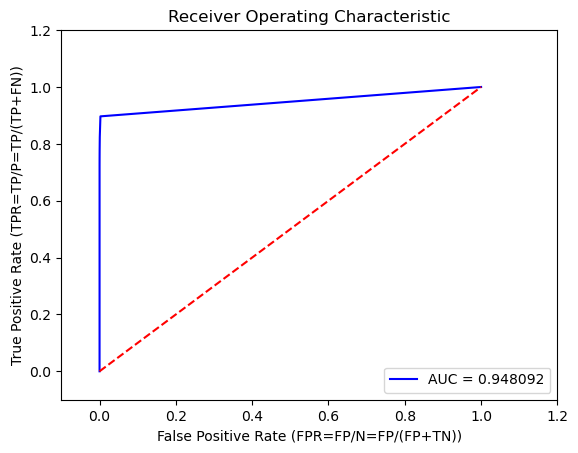

In [26]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_predict_proba)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate (TPR=TP/P=TP/(TP+FN))')
plt.xlabel('False Positive Rate (FPR=FP/N=FP/(FP+TN))')
plt.show()


In [27]:
import joblib

In [28]:
joblib.dump(knn, "knn_model_joblib.pkl")

['knn_model_joblib.pkl']